In [52]:
import csv
import matplotlib.pyplot as plt

def plot_lines_not_filtered(csv_file, x_col, y_col, status_col, min_val, max_val, title, ylabel):
    x_values = []
    y_values = []
    status_values = []

    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row

        for row in reader:
            x_values.append(float(row[x_col]))
            y_values.append(float(row[y_col]))
            status_values.append(float(row[status_col]))

    plt.plot(x_values, y_values, label='Y1')
    plt.plot(x_values, status_values, label='Status')
    plt.axhline(y=min_val, color='r', linestyle='--', label='Min Value')
    plt.axhline(y=max_val, color='r', linestyle='--', label='Max Value')

    plt.xlabel('time [sec]')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_lines_no_status(csv_file, x_col, y_col, min_val, max_val, title, ylabel):
    x_values = []
    y_values = []

    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row

        for row in reader:
            x_values.append(float(row[x_col]))
            y_values.append(float(row[y_col]))

    plt.plot(x_values, y_values, label='Y1')
    plt.axhline(y=min_val, color='r', linestyle='--', label='Min Value')
    plt.axhline(y=max_val, color='r', linestyle='--', label='Max Value')

    plt.xlabel('time [sec]')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_lines_filtered(csv_file, x_col, y_col, status_col, min_val, max_val, title, ylabel):
    x_values = []
    y_values = []
    status_values = []

    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row

        for row in reader:
            x_values.append(float(row[x_col]))
            y_values.append(float(row[y_col]))
            status_values.append(float(row[status_col]))

    filtered_x = []
    filtered_y = []

    for x, y, status in zip(x_values, y_values, status_values):
        if status != 3:
            filtered_x.append(x)
            filtered_y.append(y)

    plt.plot(filtered_x, filtered_y, label='Filtered Y')
    plt.axhline(y=min_val, color='r', linestyle='--', label='Min Value')
    plt.axhline(y=max_val, color='r', linestyle='--', label='Max Value')

    plt.xlabel('time [sec]')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

import csv

def calculate_range_percentage_not_filtered(csv_file, column, min_value, max_value):
    total_rows = 0
    range_count = 0

    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            try:
                value = float(row[column])
                if min_value <= value and value <= max_value:
                    range_count += 1
                total_rows += 1
            except (KeyError, ValueError):
                pass

    if total_rows > 0:
        percentage = (range_count / total_rows) * 100
    else:
        percentage = 0

    print(f'The non filtered accuracy percentage is: {percentage}')

    return percentage

def calculate_range_percentage_filtered(csv_file, column, min_value, max_value, status_col=1):
    total_rows = 0
    range_count = 0

    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            try:
                value = float(row[column])
                if int(row[status_col]) == 3: continue
                if min_value <= value and value <= max_value:
                    range_count += 1
                total_rows += 1
            except (KeyError, ValueError):
                pass

    if total_rows > 0:
        percentage = (range_count / total_rows) * 100
    else:
        percentage = 0

    print(f'The filtered accuracy percentage is: {percentage}')

    return percentage


csv_file = '/home/guyho/Documents/GitHub/ZumoPi_LiDAR/plots/plot_15_mins.csv'

# Distance

The non filtered accuracy percentage is: 98.3770861625832
The filtered accuracy percentage is: 99.14722292670555


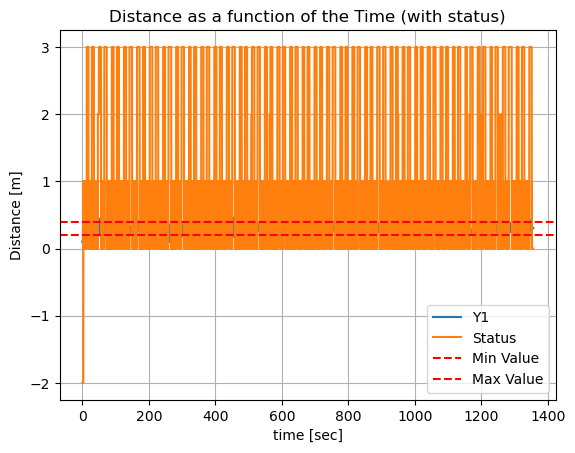

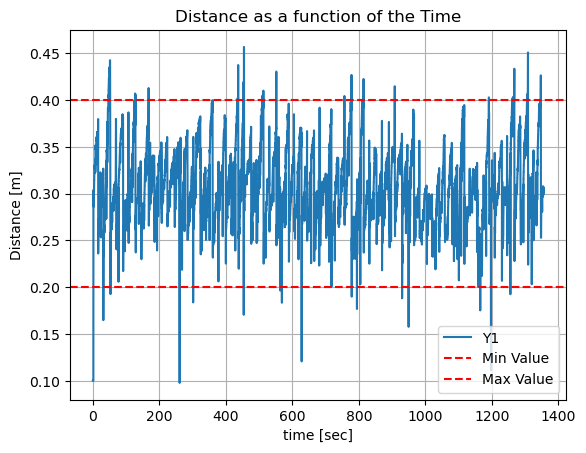

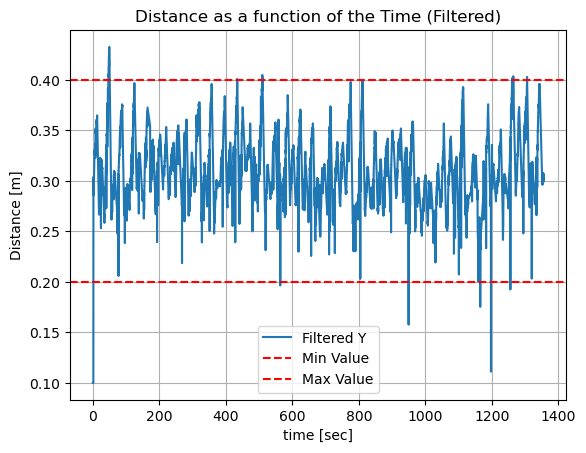

In [55]:
min_right_dist = 0.2
max_right_dist = 0.4
calculate_range_percentage_not_filtered(csv_file=csv_file, column=3, min_value=min_right_dist, max_value=max_right_dist)
calculate_range_percentage_filtered(csv_file=csv_file, column=3, min_value=min_right_dist, max_value=max_right_dist)
plot_lines_not_filtered(csv_file=csv_file, x_col=0, y_col=3, status_col=1, min_val=min_right_dist, max_val=max_right_dist, title='Distance as a function of the Time (with status)', ylabel='Distance [m]')
plot_lines_no_status(csv_file=csv_file, x_col=0, y_col=3, min_val=min_right_dist, max_val=max_right_dist, title='Distance as a function of the Time', ylabel='Distance [m]')
plot_lines_filtered(csv_file=csv_file, x_col=0, y_col=3, status_col=1, min_val=min_right_dist, max_val=max_right_dist, title='Distance as a function of the Time (Filtered)', ylabel='Distance [m]')

# Angle

The non filtered accuracy percentage is: 99.15599501677909
The filtered accuracy percentage is: 99.5213035759574


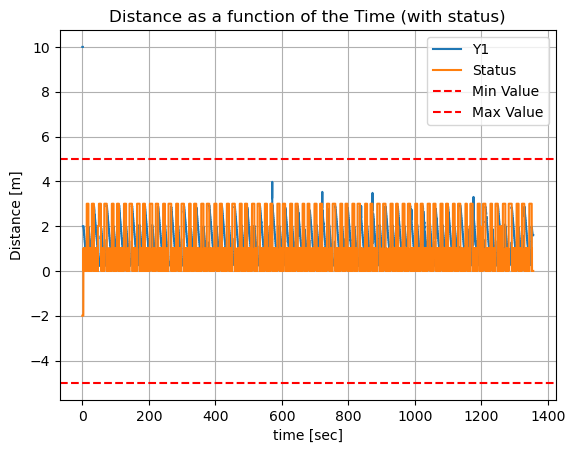

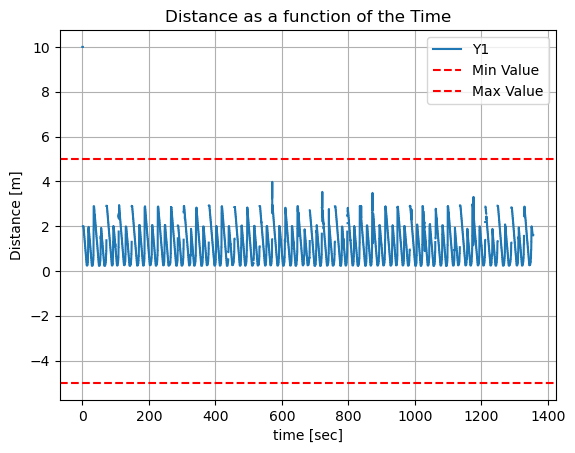

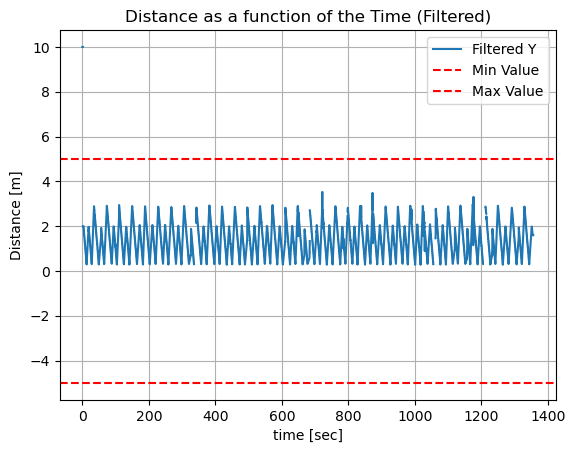

In [59]:
min_right_ang = -5
max_right_ang = 5
calculate_range_percentage_not_filtered(csv_file=csv_file, column=2, min_value=min_right_ang, max_value=max_right_ang)
calculate_range_percentage_filtered(csv_file=csv_file, column=2, min_value=min_right_ang, max_value=max_right_ang)
plot_lines_not_filtered(csv_file=csv_file, x_col=0, y_col=2, status_col=1, min_val=min_right_ang, max_val=max_right_ang, title='Distance as a function of the Time (with status)', ylabel='Distance [m]')
plot_lines_no_status(csv_file=csv_file, x_col=0, y_col=2, min_val=min_right_ang, max_val=max_right_ang, title='Distance as a function of the Time', ylabel='Distance [m]')
plot_lines_filtered(csv_file=csv_file, x_col=0, y_col=2, status_col=1, min_val=min_right_ang, max_val=max_right_ang, title='Distance as a function of the Time (Filtered)', ylabel='Distance [m]')